# Ramen Rating

The Ramen Rater is a product review website for the hardcore ramen enthusiast

Each record in the dataset is a single ramen product review. Review numbers are contiguous: more recently reviewed ramen varieties have higher numbers. Brand, Variety (the product name), Country, and Style (Cup? Bowl? Tray?) are pretty self-explanatory. Stars indicate the ramen quality, as assessed by the reviewer, on a 5-point scale.

https://www.kaggle.com/datasets/residentmario/ramen-ratings

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ramen = pd.read_csv('ramen-ratings.csv')
ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


# Data Preparation

In [ ]:
ramen.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

## isi NaN dengan "No Style"

In [ ]:
ramen[ramen['Style'].isna()]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75,NaN
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3,NaN


In [ ]:
ramen['Style'] = ramen['Style'].fillna('No Style')

In [ ]:
ramen[ramen['Style'].isna()]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten


## Drop kolom Top Ten karena tidak dipakai untuk analisis

In [ ]:
ramen = ramen.drop('Top Ten', axis=1)

In [ ]:
ramen.isna().sum()

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
dtype: int64

## Di kolom "Stars" (rating yang diberikan customer, 1-5) masih terdapat value yg berisi "Unrated".
Disini akan mengganti Unrated menjadi angka rating yang paling banyak menggunakan Mode

In [ ]:
mode_stars = ramen['Stars'].mode()[0]

# Replace the specific string with the mode
ramen['Stars'] = ramen['Stars'].replace('Unrated', mode_stars)

In [ ]:
ramen['Stars'] = ramen['Stars'].astype(float)

In [ ]:
ramen.dtypes

Review #      int64
Brand        object
Variety      object
Style        object
Country      object
Stars       float64
dtype: object

# Data Visualization

## Which packaging is the most produced?

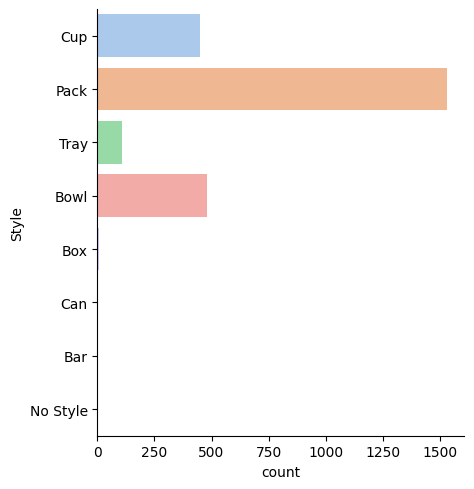

In [ ]:
sns.catplot(data=ramen, y='Style', kind='count', palette='pastel')

## How is ramen manufacturing internationally distributed?

In [ ]:
ramen['Country'].unique()

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'], dtype=object)

In [ ]:
sort_countries = ramen['Country'].value_counts().sort_values(ascending=False).index

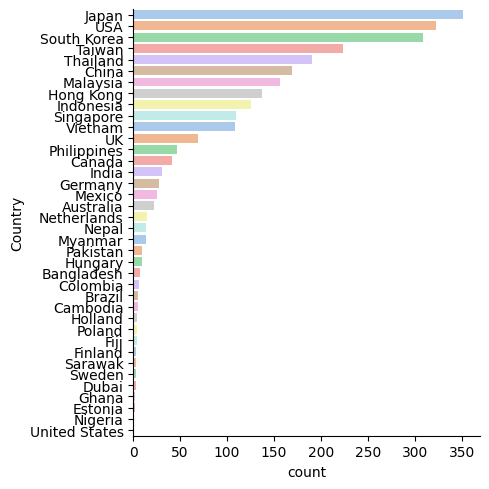

In [ ]:
sns.catplot(data=ramen, y='Country', kind='count', palette='pastel', order=sort_countries)

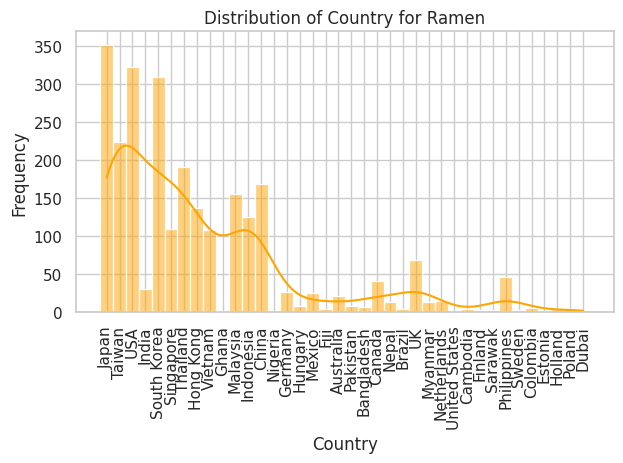

In [ ]:
sns.set(style="whitegrid")
hist_plot = sns.histplot(data=ramen, x='Country', bins=20, kde=True, color='orange')
hist_plot.set(xlabel="Country", ylabel="Frequency")
plt.title("Distribution of Country for Ramen")
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()
plt.show()

## Ramen rating distribution

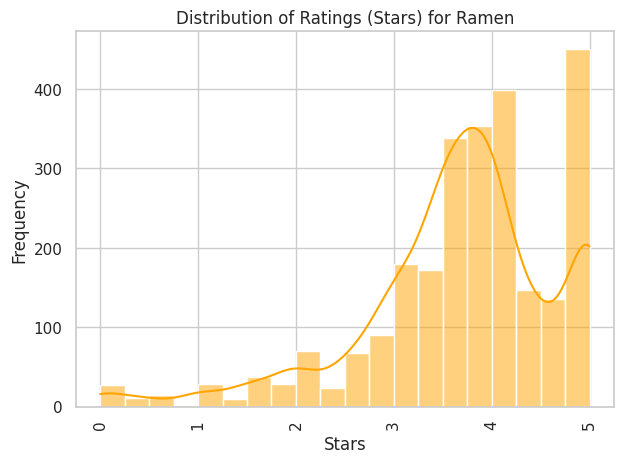

In [ ]:
sns.set(style="whitegrid")
hist_plot = sns.histplot(data=ramen, x='Stars', bins=20, kde=True, color='orange')
hist_plot.set(xlabel="Stars", ylabel="Frequency")
plt.title("Distribution of Ratings (Stars) for Ramen")
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()
plt.show()

## 10 most popular brand

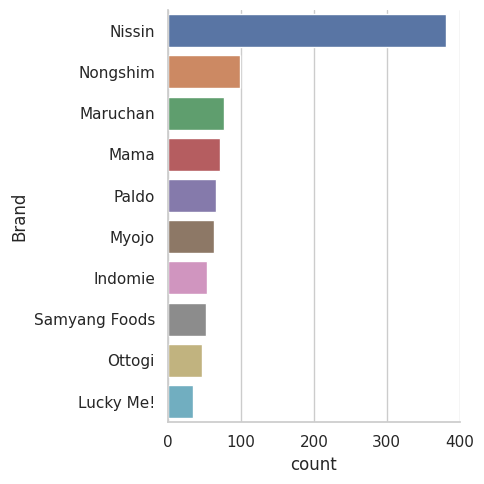

In [ ]:
count_brand = ramen['Brand'].value_counts()

# Extract the top 10 popular brands
top_10_brands = count_brand.head(10)

# Filter the DataFrame to include only the top 10 popular brands
top_10_ramen = ramen[ramen['Brand'].isin(top_10_brands.index)]

# Create the catplot
sns.catplot(data=top_10_ramen, y='Brand', kind='count', order=top_10_brands.index)
plt.show()